### 10X
/home/icb/chaichoompu/Group/workspace/data_integration_datasets/10x/merged_windows
### Cusanovich
/home/icb/chaichoompu/Group/workspace/data_integration_datasets/cusanovich/merged_windows
### Fang
/home/icb/chaichoompu/Group/workspace/data_integration_datasets/fang/merged_windows


In [1]:
import scanpy as sc
import episcanpy.api as epi
import numpy as np
import anndata as ad
import pandas as pd
import copy
import random

/home/icb/anna.danese/.local/lib/python3.7/site-packages/scanpy/api/__init__.py:7: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


In [2]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

# Pre-processing 10x
We need to filter the barcodes. 

In [3]:
%ls /home/icb/chaichoompu/Group/workspace/data_integration_datasets/10x/merged_windows

atac_v1_adult_brain_fresh_5k_fragments_AllCells.h5ad*
atac_v1_adult_brain_fresh_5k_fragments_intersectedCells.h5ad*


### Load the 10x windows count matrix

In [3]:
input_dir_10x = '/home/icb/chaichoompu/Group/workspace/data_integration_datasets/10x/merged_windows/'
input_dir_10x = '/home/icb/anna.danese/integration_resubmission/'

adata = ad.read(input_dir_10x+'atac_v1_adult_brain_fresh_5k_fragments_AllCells.h5ad')
adata

AnnData object with n_obs × n_vars = 335609 × 545114

### Download and load the barcode file from 10x 

In [4]:
#!wget https://cf.10xgenomics.com/samples/cell-atac/1.2.0/atac_v1_adult_brain_fresh_5k/atac_v1_adult_brain_fresh_5k_singlecell.csv
#!wget https://cf.10xgenomics.com/samples/cell-atac/1.2.0/atac_v1_adult_brain_fresh_5k/atac_v1_adult_brain_fresh_5k_filtered_peak_bc_matrix.tar.gz


In [5]:
#!gunzip -d atac_v1_adult_brain_fresh_5k_filtered_peak_bc_matrix.tar

In [6]:
#!tar -xvf atac_v1_adult_brain_fresh_5k_filtered_peak_bc_matrix.tar

In [7]:
with open('filtered_peak_bc_matrix/barcodes.tsv') as f:
    barcodes = f.readlines()
    barcodes = [x.rstrip('\n') for x in barcodes]
barcodes

['AAACGAAAGTAATCAG-1',
 'AAACGAACACGCTGTG-1',
 'AAACGAATCCTGGGAC-1',
 'AAACGAATCGGGAAAC-1',
 'AAACTCGAGAAAGCAG-1',
 'AAACTCGAGAATAGTC-1',
 'AAACTCGAGACACTTC-1',
 'AAACTCGCAAATTCCG-1',
 'AAACTCGCACATGATC-1',
 'AAACTCGGTTAACCAC-1',
 'AAACTCGGTTACTACG-1',
 'AAACTCGGTTCCGCGA-1',
 'AAACTCGTCCAACGCG-1',
 'AAACTCGTCCATCATT-1',
 'AAACTCGTCGAGTTAC-1',
 'AAACTCGTCTGGGCGT-1',
 'AAACTGCAGGGTTCTT-1',
 'AAACTGCCACTCGCAG-1',
 'AAACTGCGTAGAACGC-1',
 'AAACTGCGTATTCGCA-1',
 'AAAGATGAGCACCATT-1',
 'AAAGATGAGCGAGAAA-1',
 'AAAGATGCATCACAGT-1',
 'AAAGATGCATCGCCTT-1',
 'AAAGATGTCTCATCCG-1',
 'AAAGGATAGGTCACTT-1',
 'AAAGGATCACAGTTAC-1',
 'AAAGGATCACGGCCAT-1',
 'AAAGGATCATCGTGAT-1',
 'AAAGGATGTCATGAGG-1',
 'AAAGGATGTCATTGGT-1',
 'AAAGGATGTTACCCAA-1',
 'AAAGGATTCTATTGTC-1',
 'AAAGGGCAGAGGTGGG-1',
 'AAAGGGCAGTTAGCAA-1',
 'AAAGGGCCAACGTACT-1',
 'AAAGGGCCATTGATGC-1',
 'AAAGGGCGTCAAACAA-1',
 'AAATGAGAGGGCATTG-1',
 'AAATGAGCACTGTCGG-1',
 'AAATGAGGTTTGTGAC-1',
 'AAATGAGTCAAGAGAT-1',
 'AAATGCCAGATTCCGT-1',
 'AAATGCCAG

In [8]:
adata.obs_names

Index(['AAACGAAAGAAACGCC-1', 'AAACGAAAGAAAGCAG-1', 'AAACGAAAGAAAGGGT-1',
       'AAACGAAAGAAATACC-1', 'AAACGAAAGAAATTCG-1', 'AAACGAAAGAACCATA-1',
       'AAACGAAAGAACGACC-1', 'AAACGAAAGAACTAAC-1', 'AAACGAAAGAACTCCT-1',
       'AAACGAAAGAAGACTT-1',
       ...
       'TTTGTGTTCTTACTCA-1', 'TTTGTGTTCTTATCAC-1', 'TTTGTGTTCTTCACTA-1',
       'TTTGTGTTCTTCAGAG-1', 'TTTGTGTTCTTCTTCC-1', 'TTTGTGTTCTTGTACT-1',
       'TTTGTGTTCTTGTCAT-1', 'TTTGTGTTCTTGTGCC-1', 'TTTGTGTTCTTTATCG-1',
       'TTTGTGTTCTTTCGAT-1'],
      dtype='object', length=335609)

In [9]:
annot = []
for name in adata.obs_names.tolist():
    if name in barcodes:
        annot.append('keep')
    else:
        annot.append('discard')
adata.obs['filter_barcode_cellranger'] = annot
adata

AnnData object with n_obs × n_vars = 335609 × 545114
    obs: 'filter_barcode_cellranger'

In [10]:
adata = adata[adata.obs['filter_barcode_cellranger']=='keep',:].copy()
adata

AnnData object with n_obs × n_vars = 3880 × 545114
    obs: 'filter_barcode_cellranger'

In [11]:
np.max(adata.X)

298.0

In [12]:
epi.pp.binarize(adata)

In [13]:
np.max(adata.X)

1.0

In [14]:
adata

AnnData object with n_obs × n_vars = 3880 × 545114
    obs: 'filter_barcode_cellranger'

In [15]:
epi.pp.filter_cells(adata, min_features=100)
adata

AnnData object with n_obs × n_vars = 3879 × 545114
    obs: 'filter_barcode_cellranger', 'nb_features'

In [16]:
epi.pp.filter_features(adata, min_cells=10)
adata

AnnData object with n_obs × n_vars = 3879 × 459980
    obs: 'filter_barcode_cellranger', 'nb_features'
    var: 'n_cells'

In [17]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 3879 × 459980
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'n_cells'

... storing 'filter_barcode_cellranger' as categorical


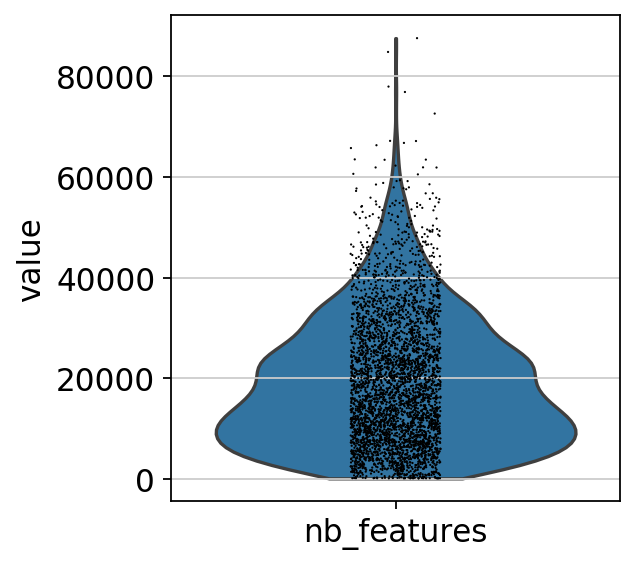

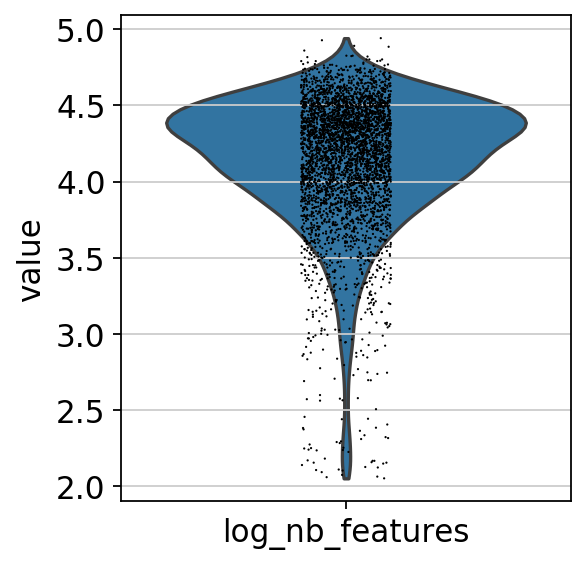

In [18]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

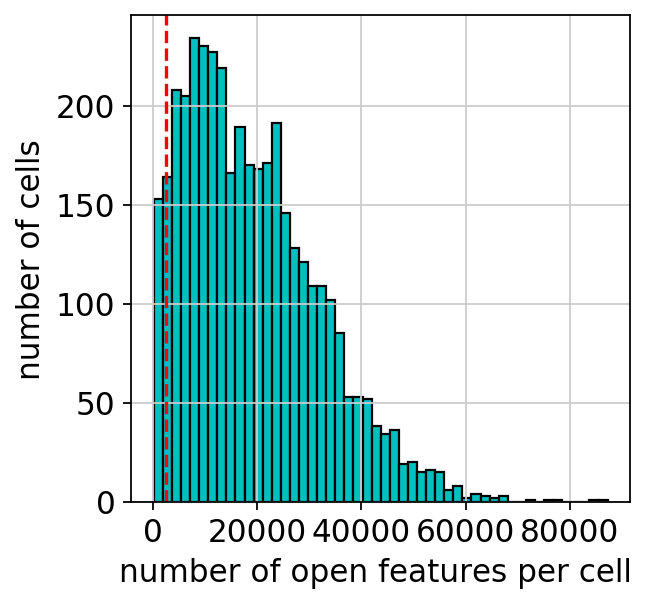

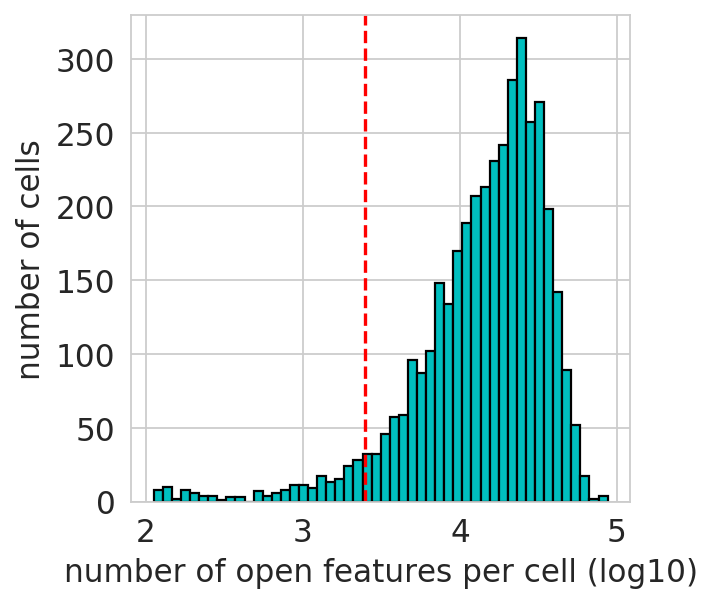

In [19]:
# set a minimum number of cells to keep 
min_features = 2500

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='10x_windows_coverage_cells.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='10x_windows_coverage_cells_log10.png')

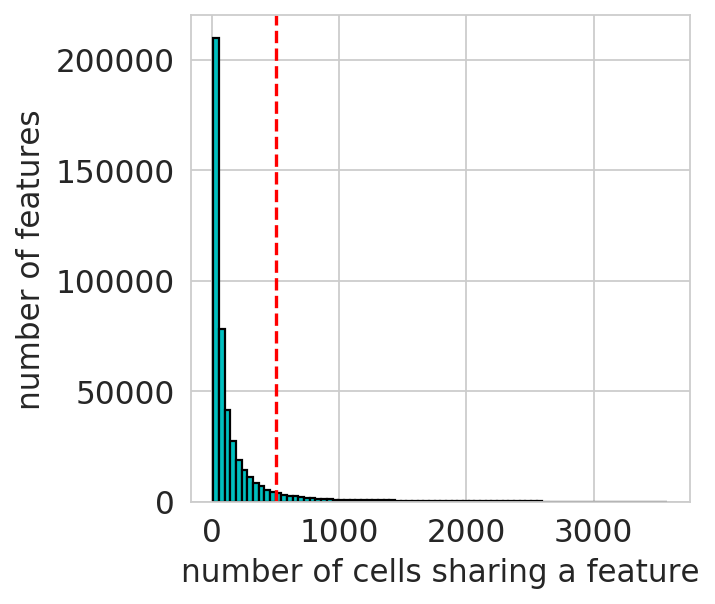

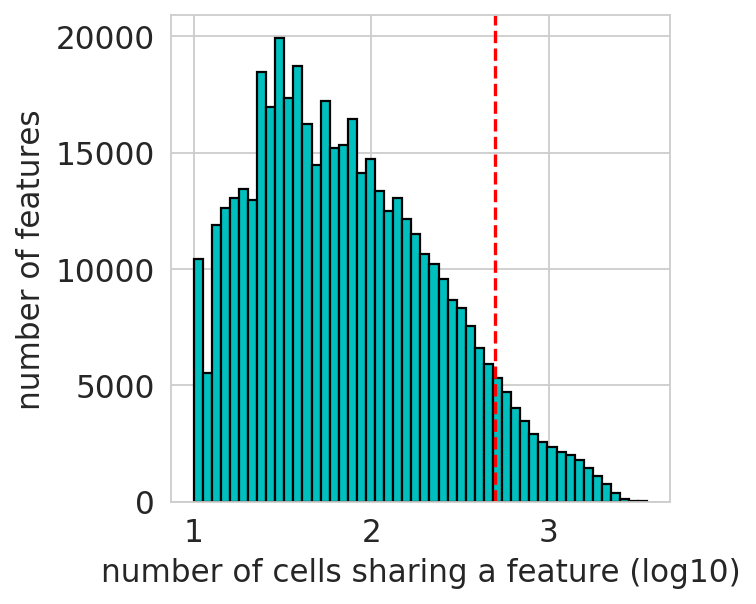

In [20]:
# minimum number of cells sharing a feature
min_cells = 500
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_windows_coverage.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_windows_coverage_log10.png')

In [21]:
min_features = 2500
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 3667 × 459980
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

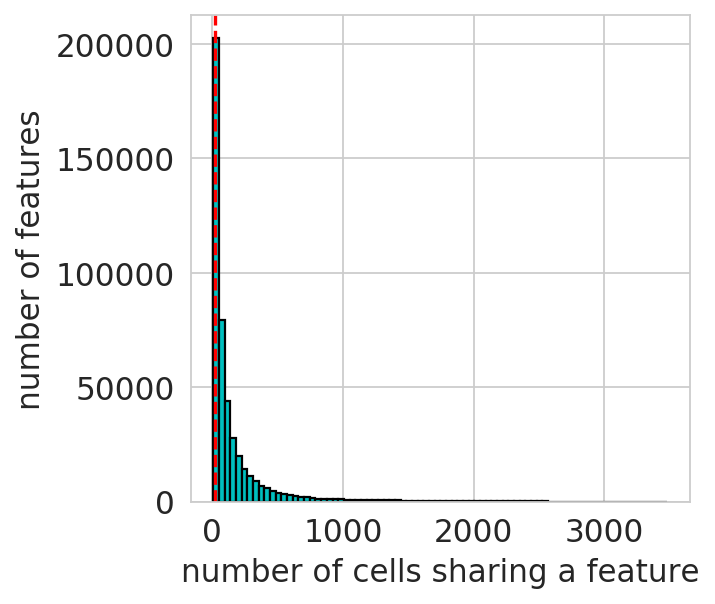

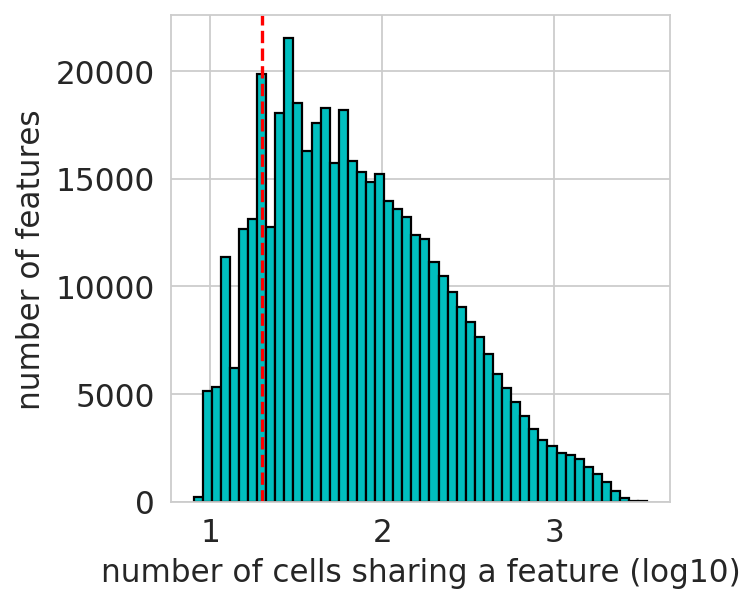

In [22]:
# minimum number of cells sharing a feature
min_cells = 20
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='10x_windows_coverage.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='10x_windows_coverage_log10.png')

In [23]:
min_cells = 20
epi.pp.filter_features(adata, min_cells=min_cells)
adata

AnnData object with n_obs × n_vars = 3667 × 399401
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

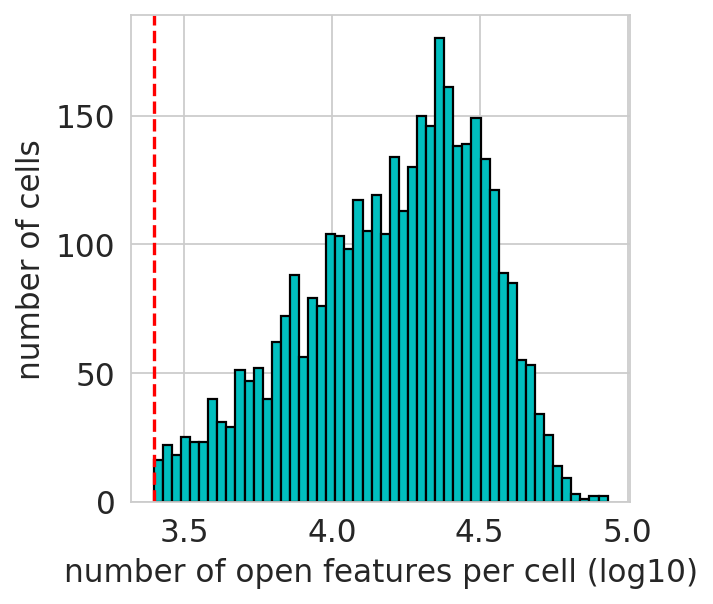

In [24]:
epi.pp.coverage_cells(adata, binary=True, log='log10', bins=50, threshold=min_features)

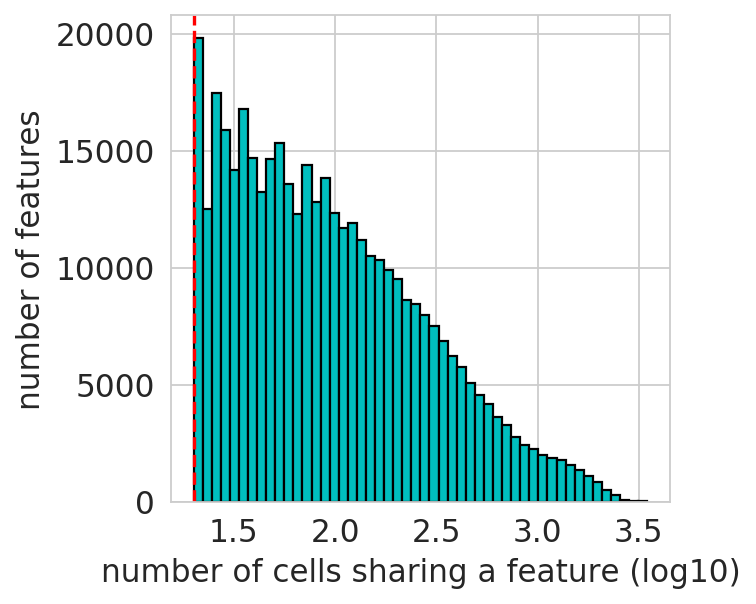

In [25]:
epi.pp.coverage_features(adata, binary=True, log='log10', bins=50, threshold=min_cells)

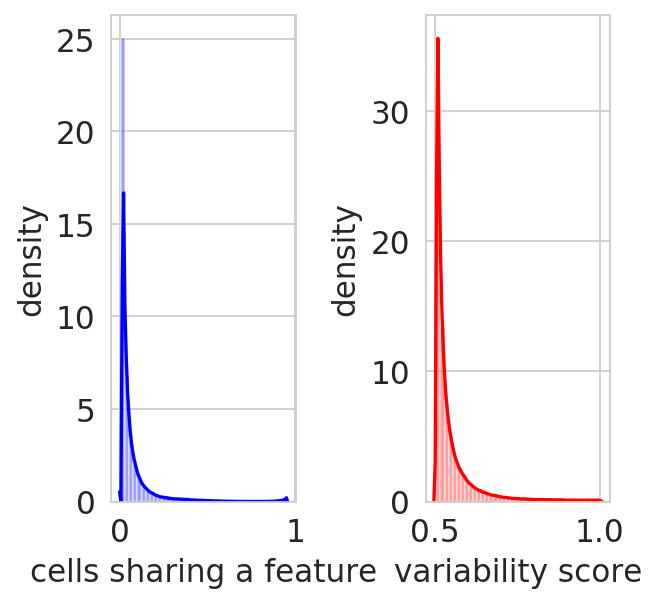

In [26]:
epi.pp.cal_var(adata)

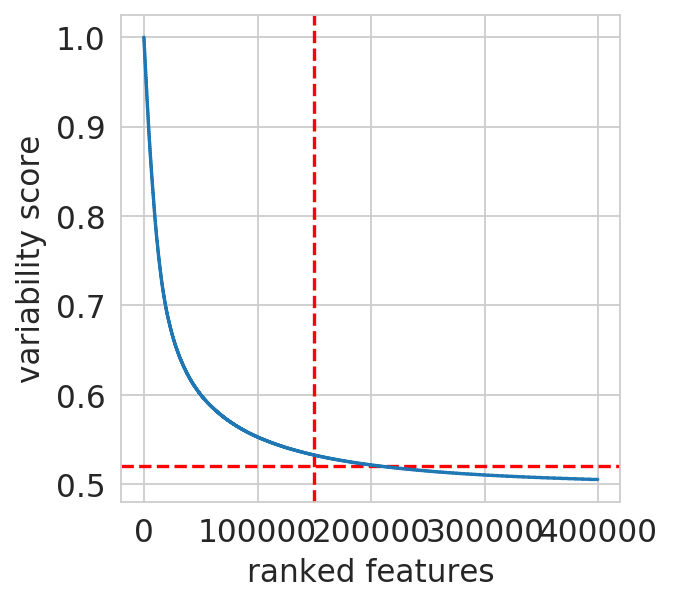

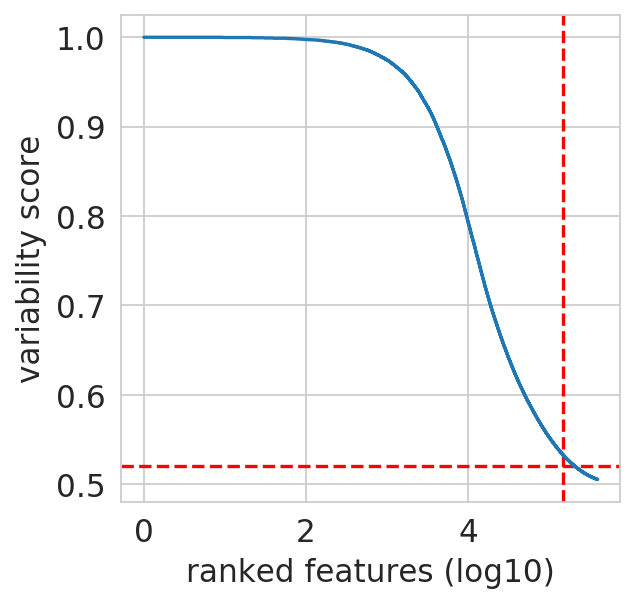

In [27]:
min_score_value = 0.52
nb_feature_selected = 150000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_10x_windows.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_10x_windows_log10.png')

In [28]:
# save the current matrix in the raw layer
adata.raw = adata

In [29]:
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [30]:
adata

View of AnnData object with n_obs × n_vars = 3667 × 150351
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

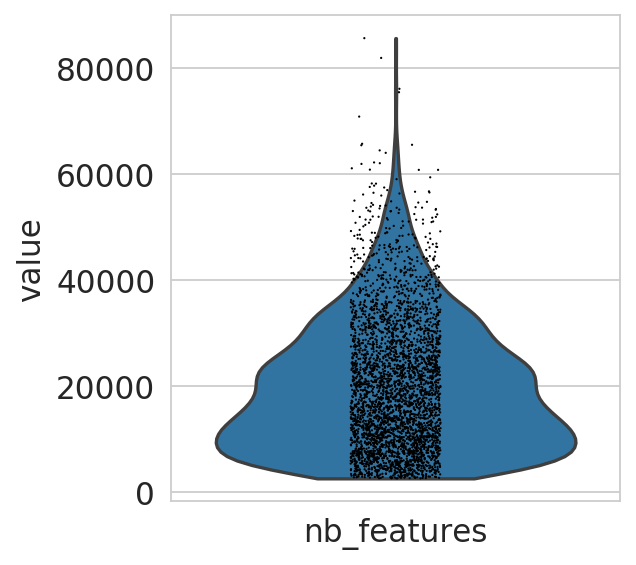

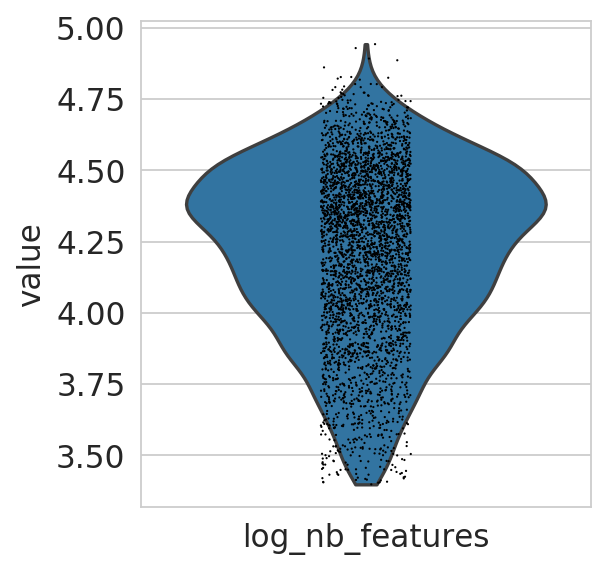

In [31]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

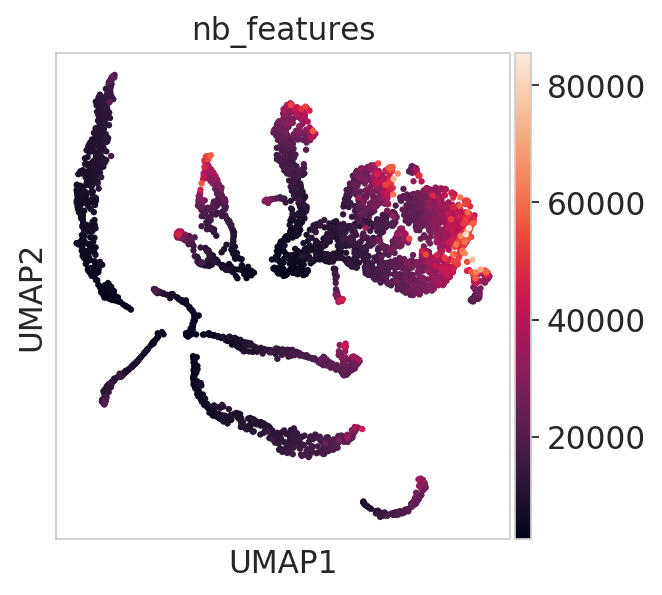

In [30]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

In [32]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata.layers['counts'] = adata.X.copy()

In [33]:
adata

AnnData object with n_obs × n_vars = 3667 × 150351
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'counts'

## Pre-processing small Fang

In [47]:
%ls /home/icb/chaichoompu/Group/workspace/data_integration_datasets/fang/merged_windows

CEMBA180226_1A_AllCells.h5ad*          CEMBA180306_2B_AllCells.h5ad*
CEMBA180226_1A_intersectedCells.h5ad*  CEMBA180306_2B_intersectedCells.h5ad*
CEMBA180227_1A_AllCells.h5ad*          CEMBA180308_3B_AllCells.h5ad*
CEMBA180227_1A_intersectedCells.h5ad*  CEMBA180308_3B_intersectedCells.h5ad*
CEMBA180305_2B_AllCells.h5ad*          CEMBA180312_3B_AllCells.h5ad*
CEMBA180305_2B_intersectedCells.h5ad*  CEMBA180312_3B_intersectedCells.h5ad*


In [34]:
input_dir_fang = '/home/icb/chaichoompu/Group/workspace/data_integration_datasets/fang/merged_windows/'
input_dir_fang = '/home/icb/anna.danese/integration_resubmission/'

adata2 = ad.read(input_dir_fang+'CEMBA180305_2B_AllCells.h5ad')
adata2

AnnData object with n_obs × n_vars = 88281 × 545118

In [35]:
np.max(adata2.X)

4886.0

In [36]:
epi.pp.binarize(adata2)

In [37]:
np.max(adata2.X)

1.0

In [38]:
epi.pp.filter_cells(adata2, min_features=100)
adata2

AnnData object with n_obs × n_vars = 14625 × 545118
    obs: 'nb_features'

In [39]:
epi.pp.filter_features(adata2, min_cells=10)
adata2

AnnData object with n_obs × n_vars = 14625 × 452276
    obs: 'nb_features'
    var: 'n_cells'

In [40]:
adata2.obs['log_nb_features'] = [np.log10(x) for x in adata2.obs['nb_features']]
adata2

AnnData object with n_obs × n_vars = 14625 × 452276
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

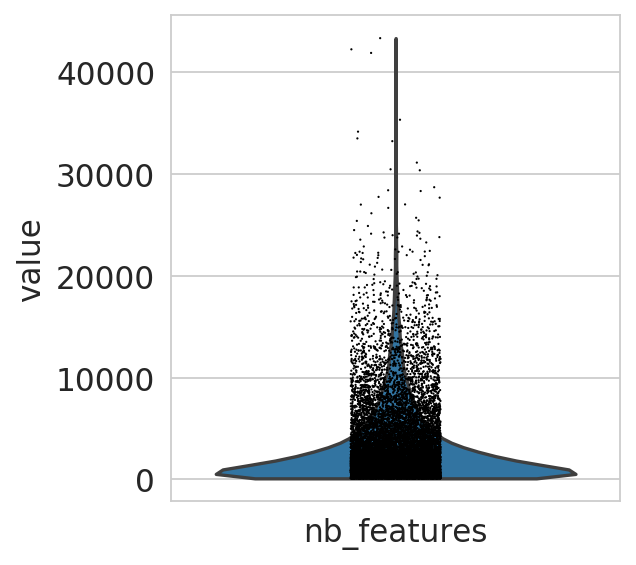

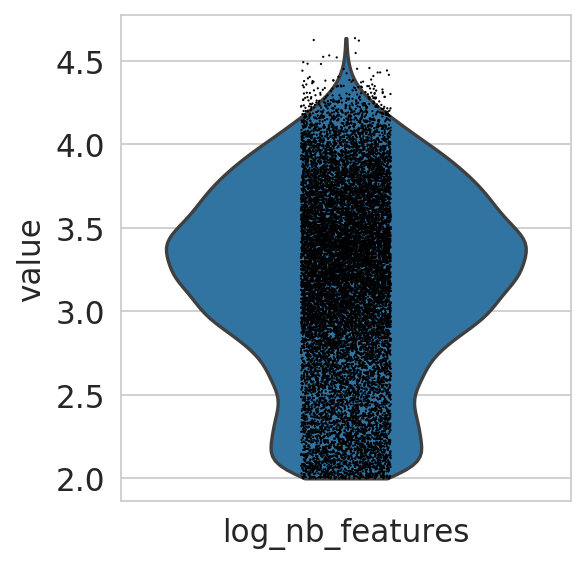

In [41]:
epi.pl.violin(adata2, ['nb_features'])
epi.pl.violin(adata2, ['log_nb_features'])

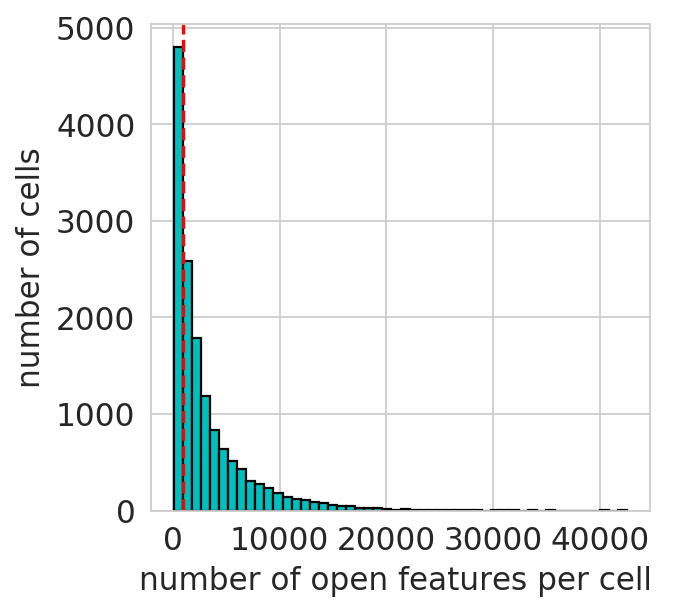

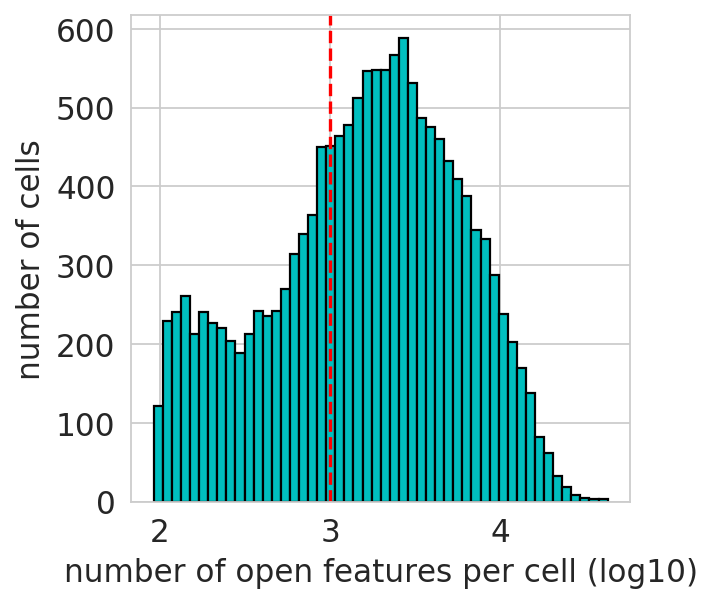

In [43]:
# set a minimum number of cells to keep 
min_features = 1000

epi.pp.coverage_cells(adata2, binary=True, log=False, bins=50,
               threshold=min_features, save='CEMBA180305_2B_windows_coverage_cells.png')
epi.pp.coverage_cells(adata2, binary=True, log=10, bins=50,
               threshold=min_features, save='CEMBA180305_2B_windows_coverage_cells_log10.png')

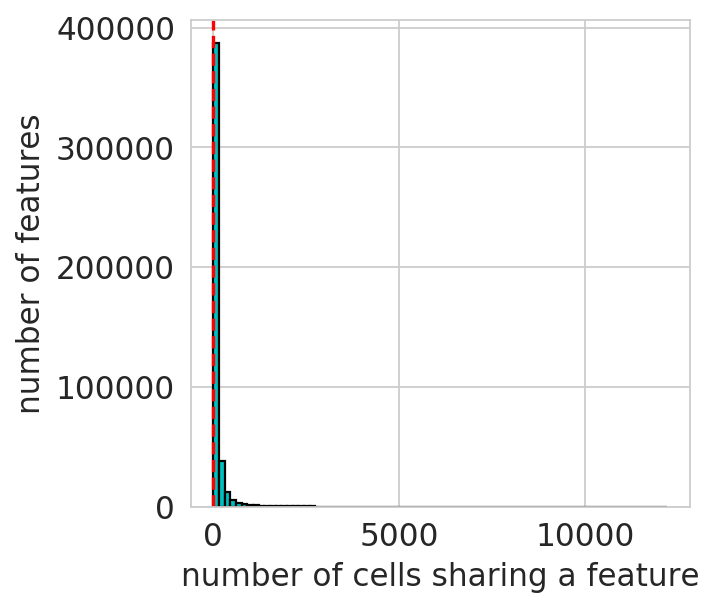

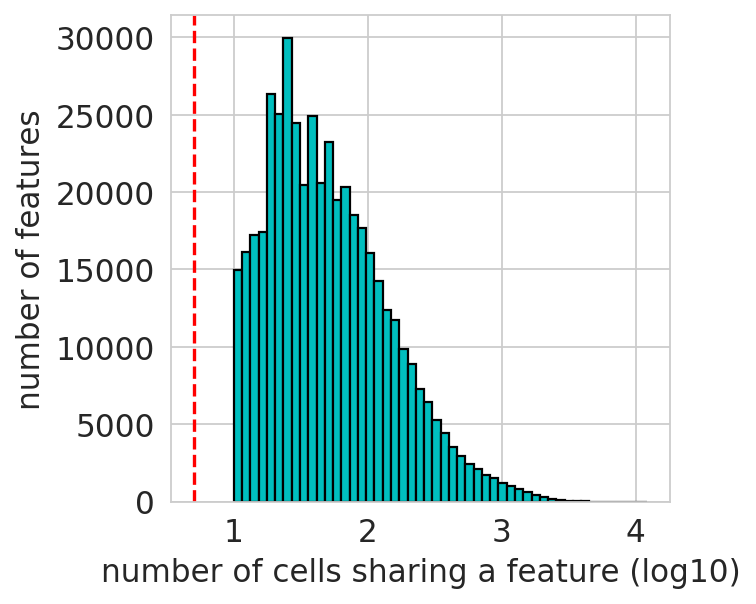

In [44]:
# minimum number of cells sharing a feature
min_cells = 5
epi.pp.coverage_features(adata2, binary=True, log=False, 
                        threshold=min_cells, save='CEMBA180305_2B_windows_coverage.png')
epi.pp.coverage_features(adata2, binary=True, log=True, 
                        threshold=min_cells, save='CEMBA180305_2B_windows_coverage_log10.png')

In [45]:
min_features = 1000
epi.pp.filter_cells(adata2, min_features=min_features)

### subsample

In [46]:
k = 4000
filtered_barcodes = random.sample(adata2.obs_names.tolist(), k)
annot = []
for n in adata2.obs_names.tolist():
    if n in filtered_barcodes:
        annot.append('keep')
    else:
        annot.append('discard')
adata2.obs['filter'] = annot
adata2 = adata2[adata2.obs['filter']=='keep',:].copy()
adata2

AnnData object with n_obs × n_vars = 4000 × 452276
    obs: 'nb_features', 'log_nb_features', 'filter'
    var: 'n_cells', 'commonness'

### filter features

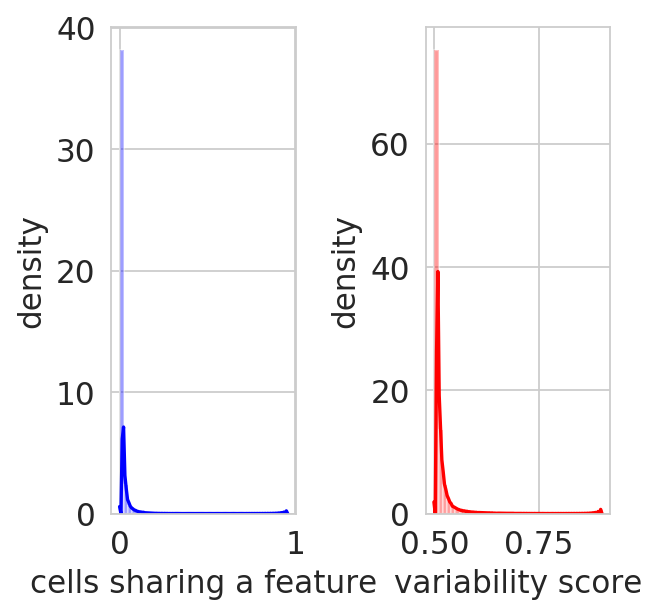

In [47]:
epi.pp.cal_var(adata2)

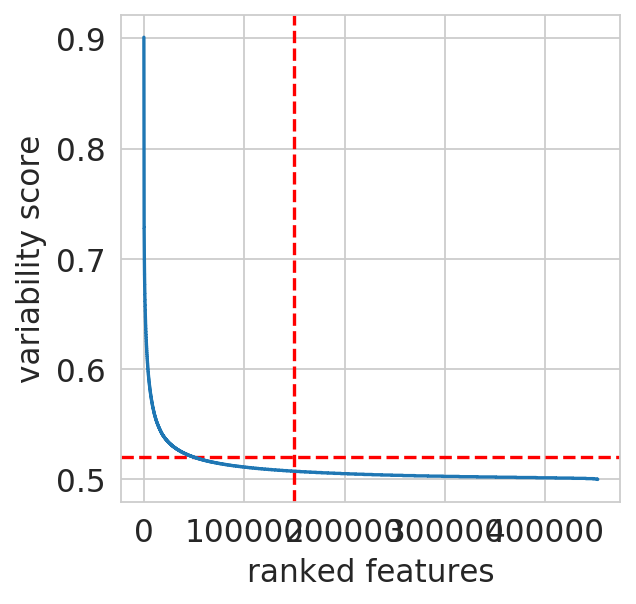

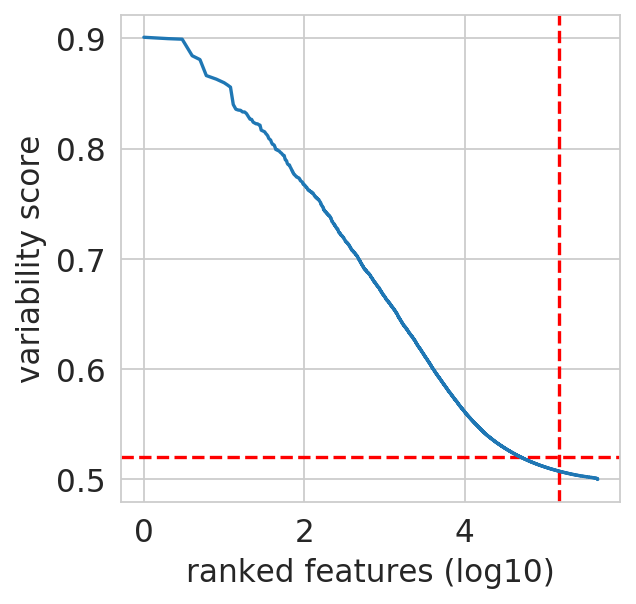

In [48]:
min_score_value = 0.52
nb_feature_selected = 150000
epi.pl.variability_features(adata2,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_CEMBA180305_2B_windows.png')

epi.pl.variability_features(adata2,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_CEMBA180305_2B_windows_log10.png')

In [49]:
adata2

AnnData object with n_obs × n_vars = 4000 × 452276
    obs: 'nb_features', 'log_nb_features', 'filter'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [50]:
# save the current matrix in the raw layer
adata2.raw = adata2

In [51]:
# create a new AnnData containing only the most variable features
adata2 = epi.pp.select_var_feature(adata2,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

In [52]:
adata2

View of AnnData object with n_obs × n_vars = 4000 × 151216
    obs: 'nb_features', 'log_nb_features', 'filter'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

Trying to set attribute `.obs` of view, copying.
... storing 'filter' as categorical


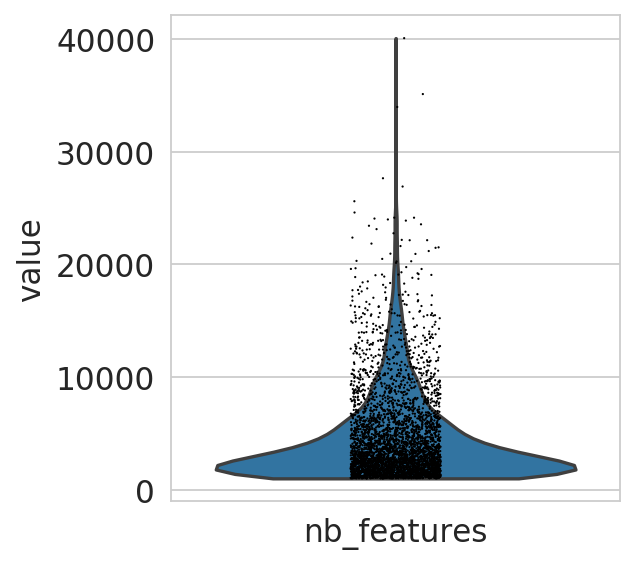

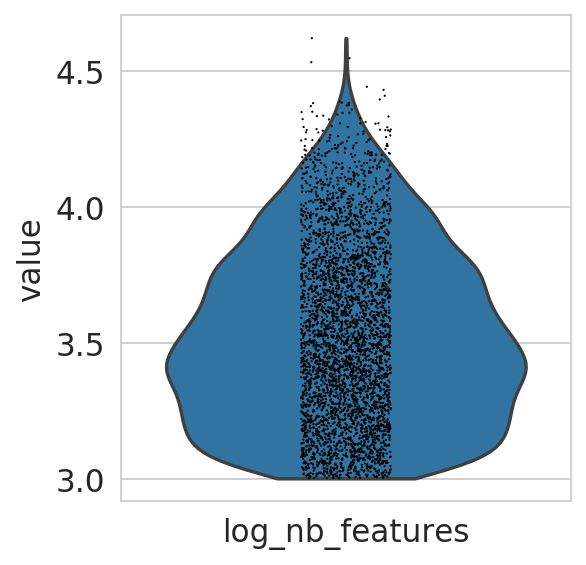

In [53]:
epi.pl.violin(adata2, ['nb_features'])
epi.pl.violin(adata2, ['log_nb_features'])

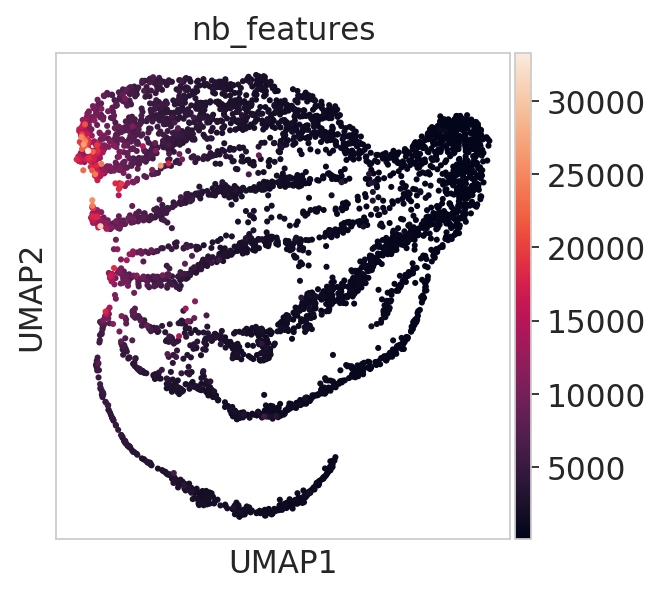

In [53]:
epi.pp.lazy(adata2)
sc.pl.umap(adata2, color=['nb_features'], wspace=0.3)

In [54]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata2.layers['counts'] = adata2.X.copy()

In [55]:
adata2

AnnData object with n_obs × n_vars = 4000 × 151216
    obs: 'nb_features', 'log_nb_features', 'filter'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'counts'

## Pre processing Cusanovich small

In [165]:
%ls /home/icb/chaichoompu/Group/workspace/data_integration_datasets/cusanovich/merged_windows

SRR6819220_AllCells.h5ad*          SRR6819246_AllCells.h5ad*
SRR6819220_intersectedCells.h5ad*  SRR6819246_intersectedCells.h5ad*
SRR6819221_AllCells.h5ad*          SRR6819247_AllCells.h5ad*
SRR6819221_intersectedCells.h5ad*  SRR6819247_intersectedCells.h5ad*
SRR6819238_AllCells.h5ad*          SRR6819248_AllCells.h5ad*
SRR6819238_intersectedCells.h5ad*  SRR6819248_intersectedCells.h5ad*
SRR6819239_AllCells.h5ad*          SRR6819249_AllCells.h5ad*
SRR6819239_intersectedCells.h5ad*  SRR6819249_intersectedCells.h5ad*


In [56]:
input_dir_Cusanovich = '/home/icb/chaichoompu/Group/workspace/data_integration_datasets/cusanovich/merged_windows/'
input_dir_Cusanovich = '/home/icb/anna.danese/integration_resubmission/'

adatacus1 = ad.read(input_dir_Cusanovich+'SRR6819246_AllCells.h5ad')
adatacus1

AnnData object with n_obs × n_vars = 35427 × 545118

In [57]:
adatacus2 = ad.read(input_dir_Cusanovich+'SRR6819247_AllCells.h5ad')
adatacus2

AnnData object with n_obs × n_vars = 36199 × 545118

In [208]:
adata3 = adatacus1.concatenate(adatacus1)
adata3

AnnData object with n_obs × n_vars = 70854 × 545118
    obs: 'batch'

In [122]:
batchname=copy.copy(adata3.obs['batch'])
batchname

batchname = batchname.map({ '1' : 'SRR6819247', '0' : 'SRR6819246' })
batchname

adata3.obs['batchname_Cusanovich'] = batchname
adata3

AnnData object with n_obs × n_vars = 70854 × 545118
    obs: 'batch', 'batchname_Cusanovich'

I need to merge the 2 files. Somehow the barcodes where sequenced twice ? 

In [58]:
## First I will add the barcodes present in the 2 files
barcodes1 = adatacus1.obs_names.tolist()
barcodes2 = adatacus2.obs_names.tolist()

annot = []
for line in barcodes1:
    if line in barcodes2:
        annot.append('keep')
    else:
        annot.append('discard')
adatacus1.obs['filter'] = annot

annot = []
for line in barcodes2:
    if line in barcodes1:
        annot.append('keep')
    else:
        annot.append('discard')
adatacus2.obs['filter'] = annot

In [59]:
adatacus1 = adatacus1[adatacus1.obs['filter']=='keep',:].copy()
adatacus1

AnnData object with n_obs × n_vars = 35035 × 545118
    obs: 'filter'

In [60]:
adatacus2 = adatacus2[adatacus2.obs['filter']=='keep',:].copy()
adatacus2

AnnData object with n_obs × n_vars = 35035 × 545118
    obs: 'filter'

In [61]:
adata3 = adatacus1.copy()
adata3.X = adata3.X+adatacus2.X
adata3

AnnData object with n_obs × n_vars = 35035 × 545118
    obs: 'filter'

In [63]:
del adata3.obs['filter'], adatacus1, adatacus2

In [64]:
# check if the data matrix is binary 
np.max(adata3.X)

3454.0

In [65]:
epi.pp.binarize(adata3)

In [66]:
# check if the data matrix is binary 
np.max(adata3.X)

1.0

In [67]:
# remove any potential empty features or barcodes
epi.pp.filter_cells(adata3, min_features=1)
epi.pp.filter_features(adata3, min_cells=1)
adata3

AnnData object with n_obs × n_vars = 35035 × 508812
    obs: 'nb_features'
    var: 'n_cells'

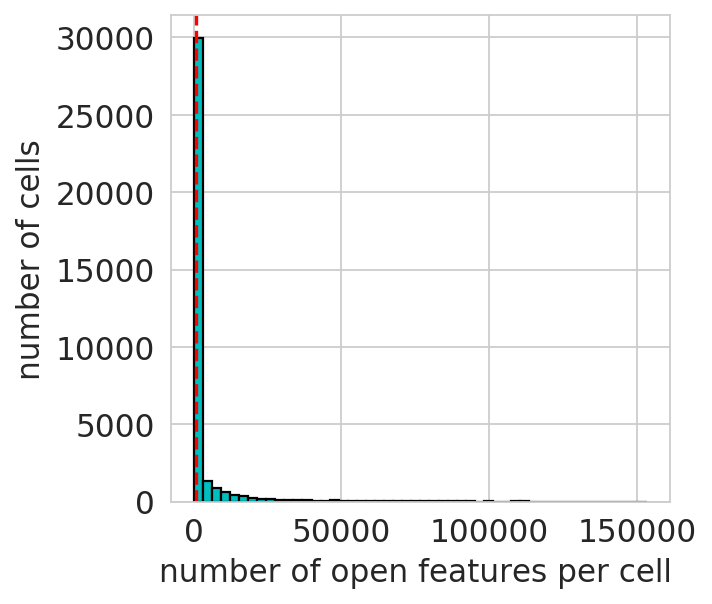

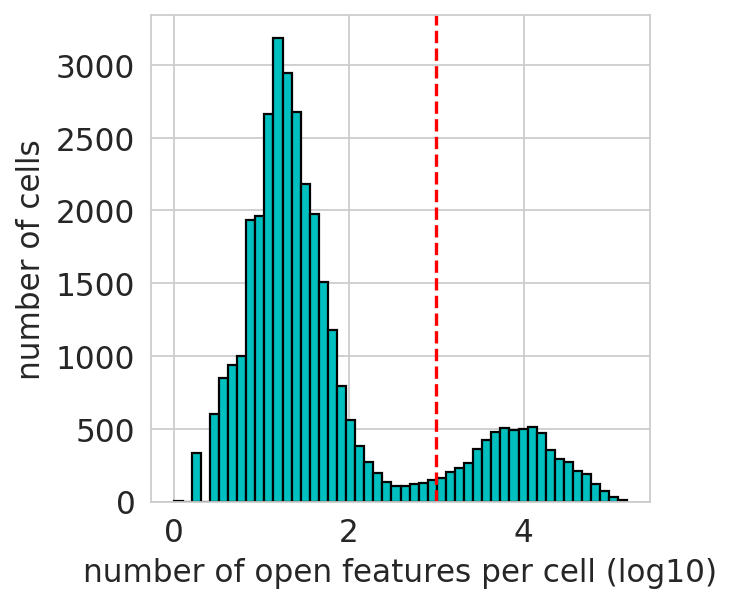

In [68]:
# set a minimum number of cells to keep 
min_features = 1000

epi.pp.coverage_cells(adata3, binary=True, log=False, bins=50,
               threshold=min_features, save='Cusanovich_coverage_cells.png')
epi.pp.coverage_cells(adata3, binary=True, log=10, bins=50,
               threshold=min_features, save='Cusanovich_coverage_cells.png')

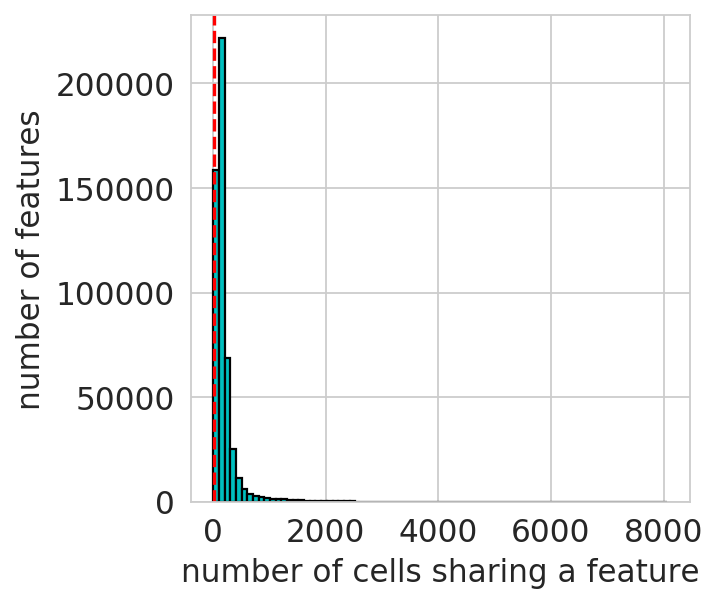

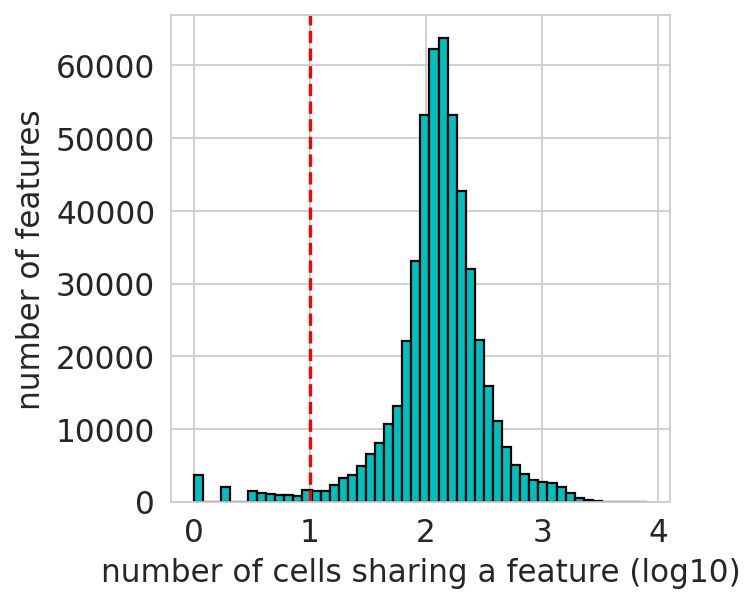

In [69]:
# minimum number of cells sharing a feature
min_cells = 10
epi.pp.coverage_features(adata3, binary=True, log=False, 
                        threshold=min_cells)
epi.pp.coverage_features(adata3, binary=True, log=True, 
                        threshold=min_cells)

In [70]:
min_features = 1000
epi.pp.filter_cells(adata3, min_features=min_features)

In [71]:
min_cells = 10
epi.pp.filter_features(adata3, min_cells=min_cells)

In [72]:
adata3

AnnData object with n_obs × n_vars = 6179 × 496006
    obs: 'nb_features'
    var: 'n_cells', 'commonness'

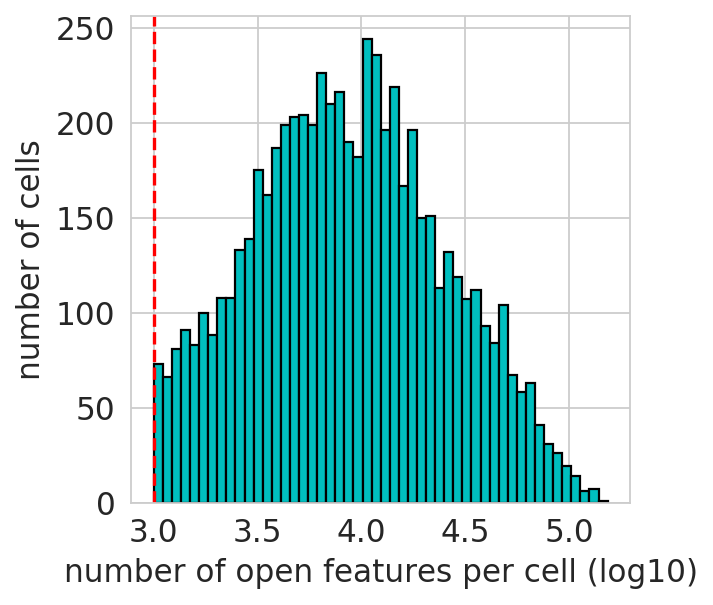

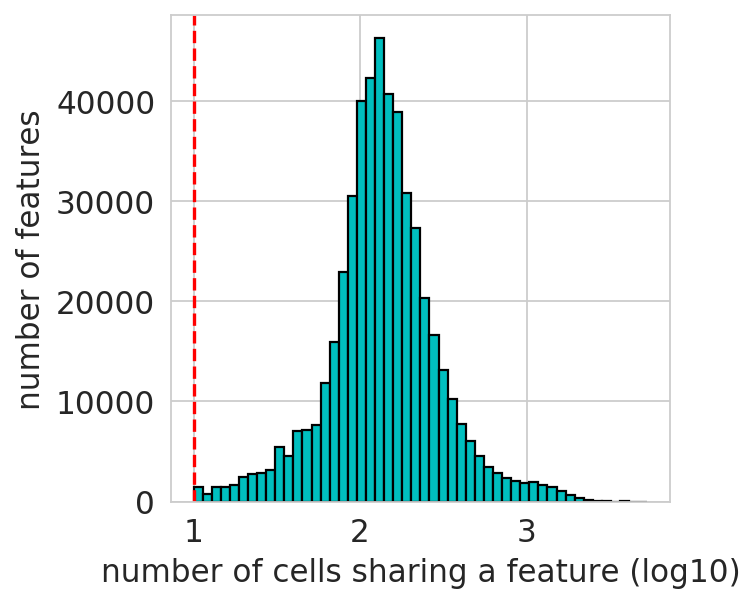

In [73]:
epi.pp.coverage_cells(adata3, binary=True, log='log10', bins=50, threshold=min_features)
epi.pp.coverage_features(adata3, binary=True, log='log10', bins=50, threshold=min_cells)


### subsample

In [74]:
k = 4000
filtered_barcodes = random.sample(adata3.obs_names.tolist(), k)
annot = []
for n in adata3.obs_names.tolist():
    if n in filtered_barcodes:
        annot.append('keep')
    else:
        annot.append('discard')
adata3.obs['filter'] = annot
adata3 = adata3[adata3.obs['filter']=='keep',:].copy()
adata3

AnnData object with n_obs × n_vars = 4000 × 496006
    obs: 'nb_features', 'filter'
    var: 'n_cells', 'commonness'

### filter features

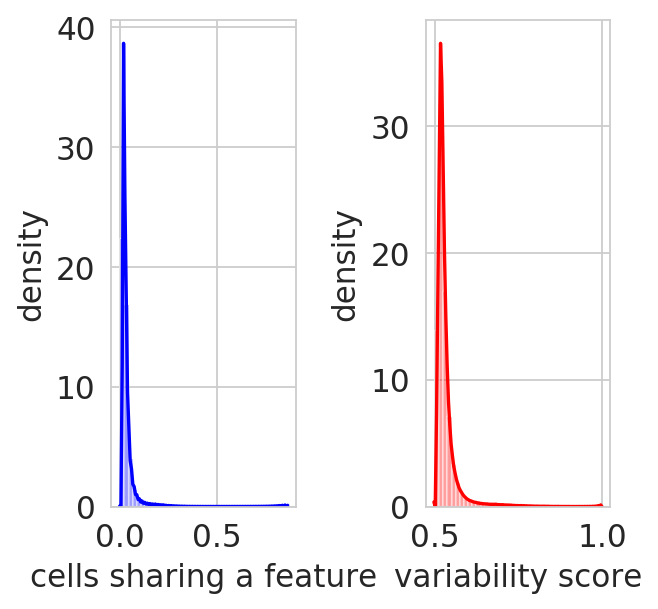

In [75]:
epi.pp.cal_var(adata3)

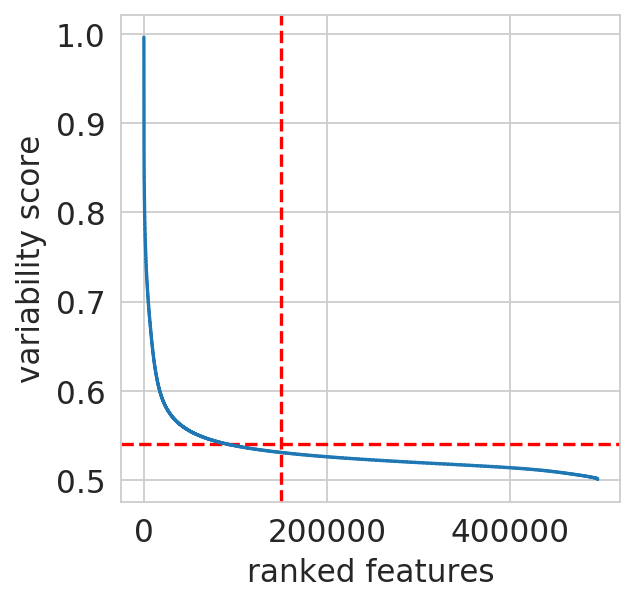

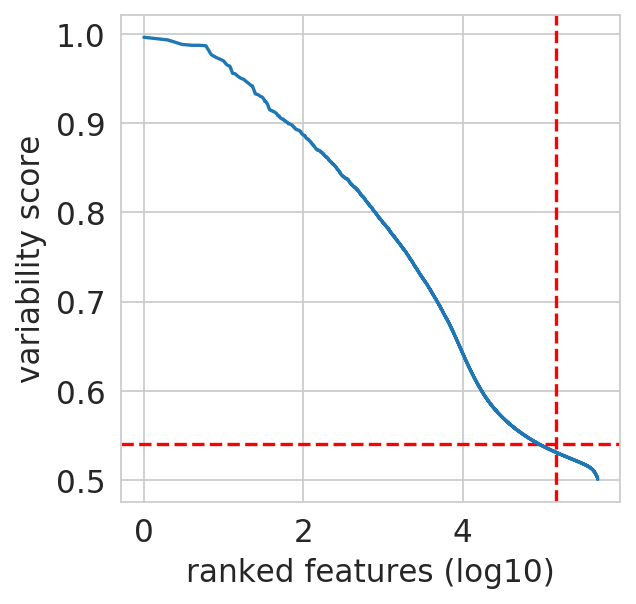

In [76]:
min_score_value = 0.54
nb_feature_selected = 150000
epi.pl.variability_features(adata3,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected)

epi.pl.variability_features(adata3,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected)

In [77]:
# save the current matrix in the raw layer
adata3.raw = adata3

In [78]:
# create a new AnnData containing only the most variable features
adata3 = epi.pp.select_var_feature(adata3,
                            nb_features=nb_feature_selected,
                            show=False,
                            copy=True)

In [79]:
adata3

View of AnnData object with n_obs × n_vars = 4000 × 151036
    obs: 'nb_features', 'filter'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [80]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata3.layers['counts'] = adata3.X.copy()

In [81]:
adata3

AnnData object with n_obs × n_vars = 4000 × 151036
    obs: 'nb_features', 'filter'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'counts'

... storing 'filter' as categorical


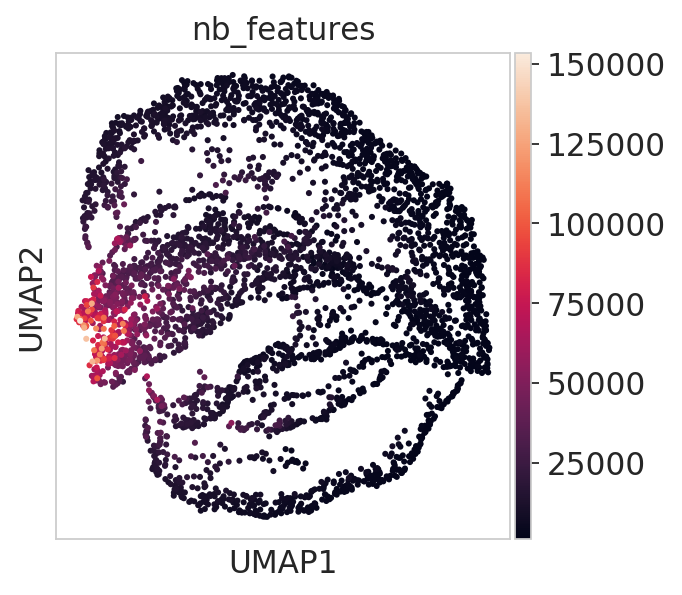

In [82]:
epi.pp.lazy(adata3)
sc.pl.umap(adata3, color=['nb_features'], wspace=0.3)

# merged datasets

In [83]:
adatamerged = adata.concatenate(adata2)
adatamerged

AnnData object with n_obs × n_vars = 7667 × 126571
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features', 'filter', 'batch'
    var: 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

In [84]:
batchname=copy.copy(adatamerged.obs['batch'])
batchname

batchname = batchname.map({ '1' : 'Fang et al.', '0' : '10x Genomics' })
batchname

adatamerged.obs['batchname'] = batchname
adatamerged

AnnData object with n_obs × n_vars = 7667 × 126571
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features', 'filter', 'batch', 'batchname'
    var: 'n_cells-0', 'commonness-0', 'prop_shared_cells-0', 'variability_score-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    layers: 'counts'

In [85]:
epi.pp.lazy(adatamerged)

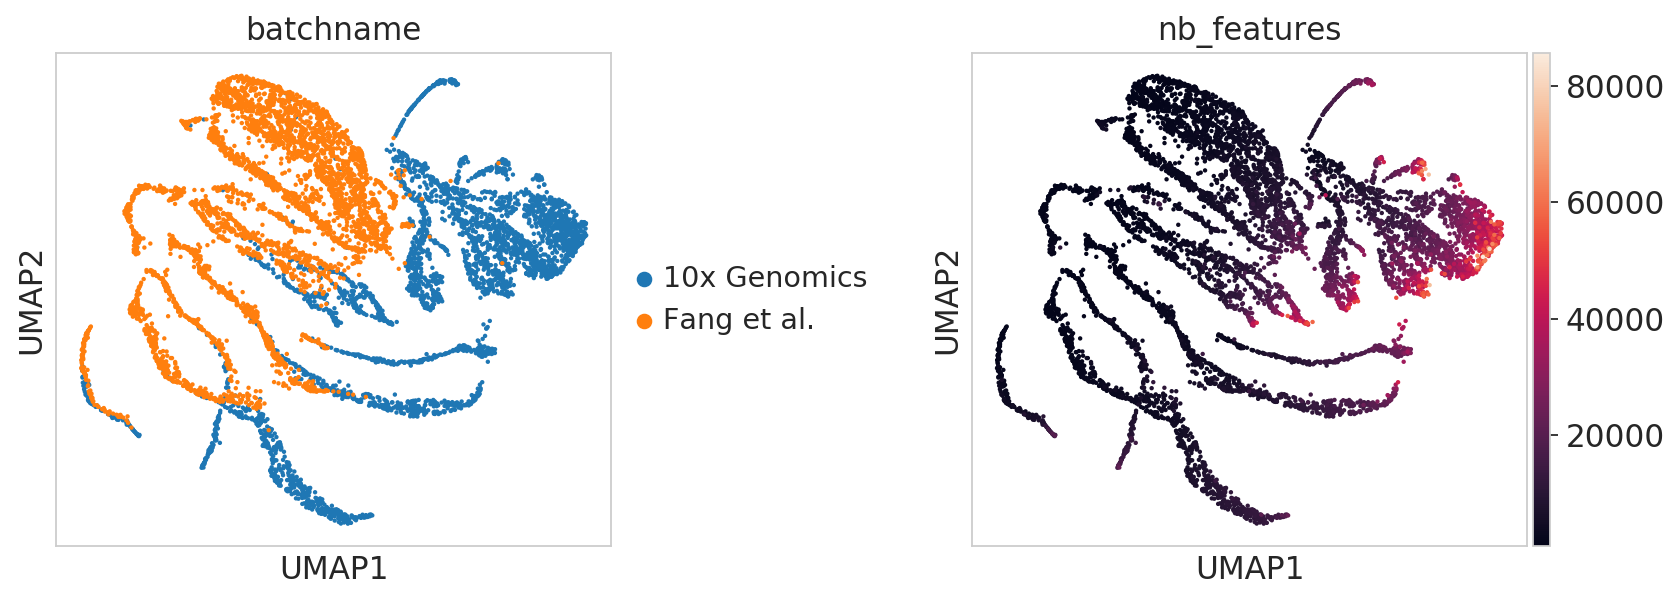

In [87]:
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

In [88]:
adatamerged = adatamerged.concatenate(adata3)
adatamerged

AnnData object with n_obs × n_vars = 11667 × 109959
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features', 'filter', 'batch', 'batchname'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [89]:
adatamerged.obs['batchname'] = adatamerged.obs['batchname'].replace(np.nan, 'Cusanovich et al.', regex=False)

In [90]:
epi.pp.lazy(adatamerged)

... storing 'filter_barcode_cellranger' as categorical
... storing 'filter' as categorical
... storing 'batchname' as categorical


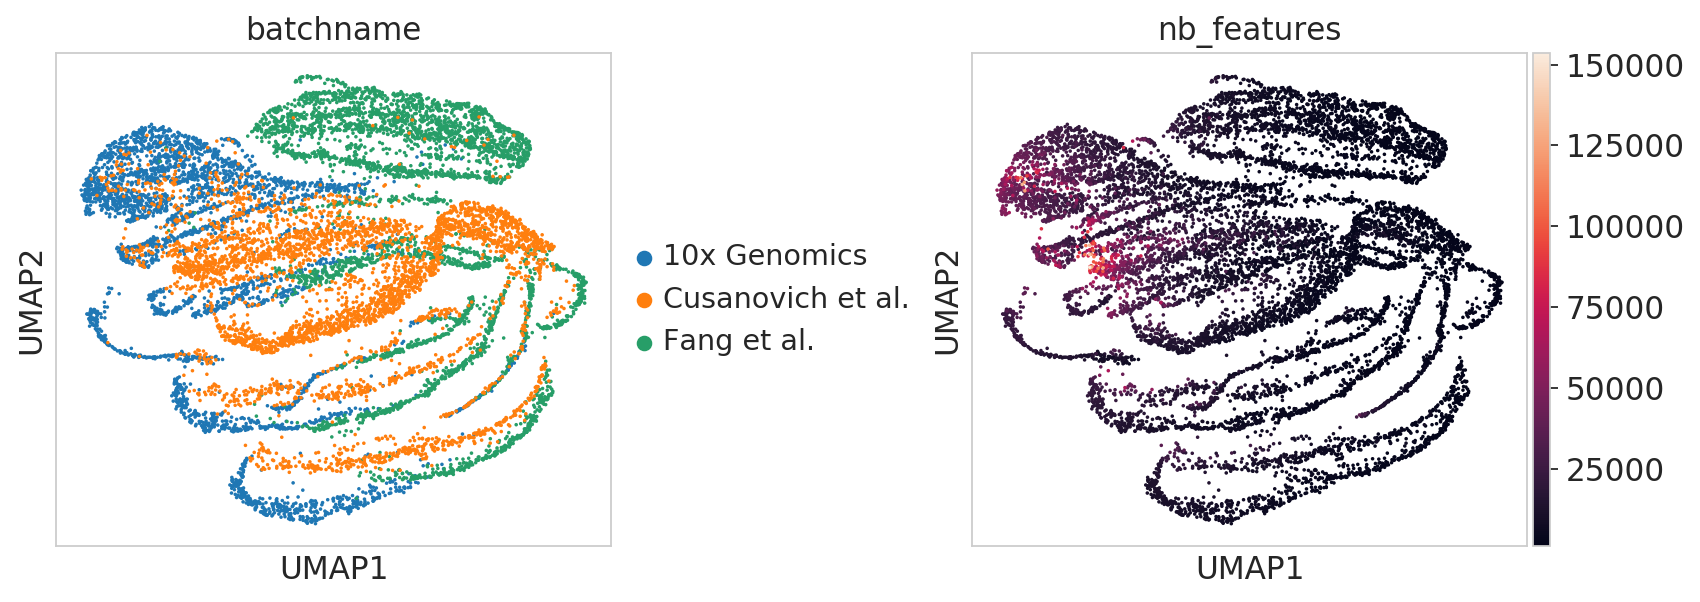

In [91]:
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

In [92]:
epi.pp.filter_cells(adatamerged, min_features=500)

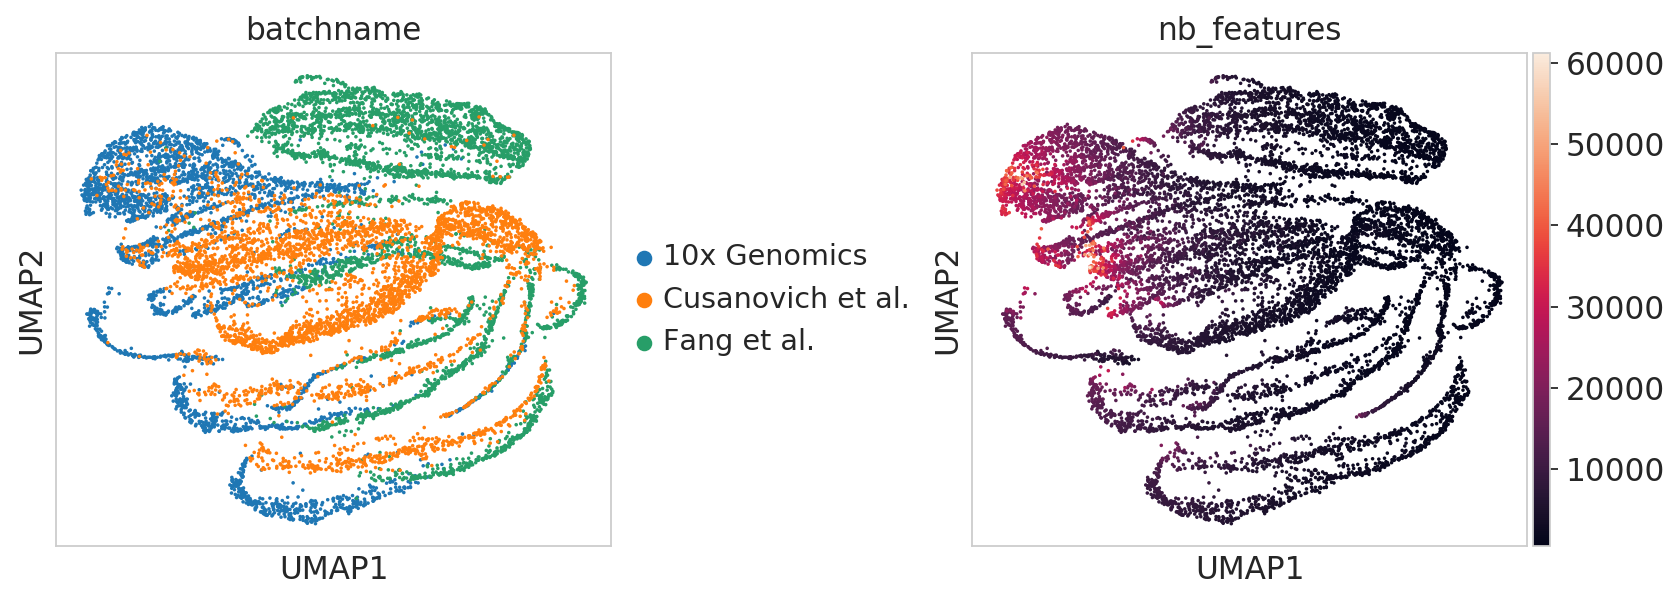

In [93]:
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

In [94]:
epi.pp.normalize_per_cell(adatamerged)

In [95]:
epi.pp.lazy(adatamerged)

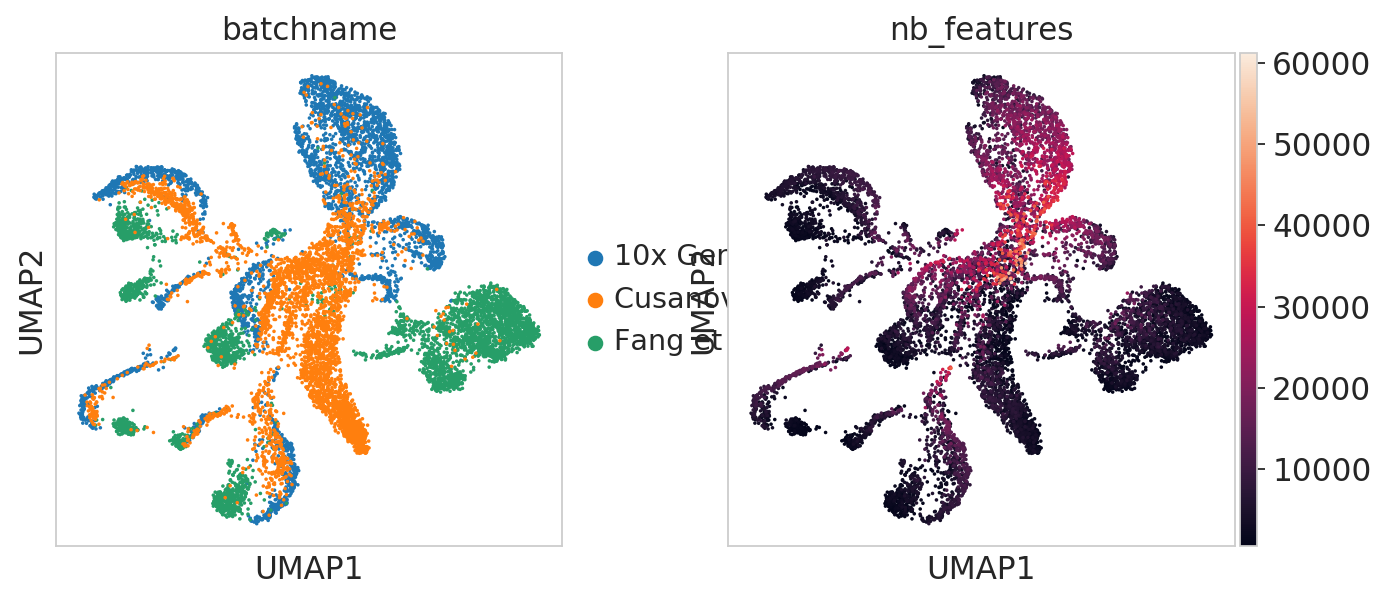

In [96]:
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'], wspace=0.5)

In [97]:
adatamerged.write('/home/icb/anna.danese/small_dataset_merged_dataset.h5ad')

In [138]:
adatamerged

AnnData object with n_obs × n_vars = 31990 × 120938
    obs: 'filter_barcode_cellranger', 'nb_features', 'log_nb_features', 'batch', 'batchname', 'batchname_Cusanovich', 'n_counts'
    var: 'n_cells-0-0', 'commonness-0-0', 'prop_shared_cells-0-0', 'variability_score-0-0', 'n_cells-1-0', 'commonness-1-0', 'prop_shared_cells-1-0', 'variability_score-1-0', 'n_cells-1', 'commonness-1', 'prop_shared_cells-1', 'variability_score-1'
    uns: 'pca', 'neighbors', 'umap', 'batch_colors', 'batchname_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [139]:
epi.pp.log1p(adatamerged)

In [140]:
epi.pp.lazy(adatamerged)

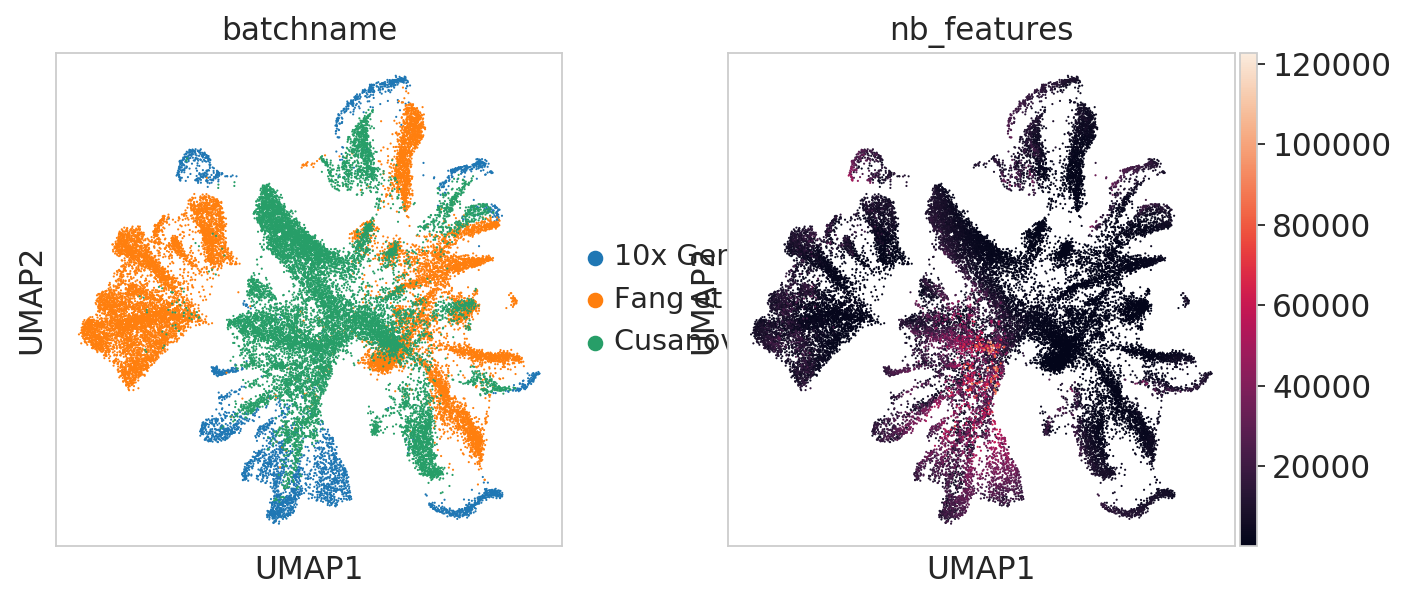

In [141]:
sc.pl.umap(adatamerged, color=['batchname', 'nb_features'])